### IMPORTANT

**Current Python version that I'm using is Python 3.10.10. I have no idea if it works on older versions but it does not work in newer versions (3.11 upwards)**

**Only run the first code if you do not have Darts library installed yet**

In [2]:
# %pip install darts

### Import libraries

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel, RNNModel
from darts.metrics import mape, rmse, mase
from darts.utils.model_selection import train_test_split

c:\Programming\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read and plot the data

- Change the csv file if you want to use other time series data.
- I suggest though to only include 300-500 entries if you change the file. Including more than the stated number will result to longer time to train the model 
- Plot the time series data read by the csv file reader

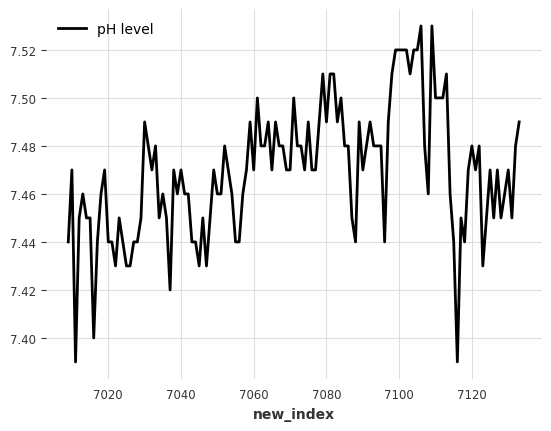

In [4]:
filtered_ph_df = pd.read_csv('new feeds testing.csv', usecols = ['new_index','temp','ph'])
random_n = random.randint(0, len(filtered_ph_df)-125)
filtered_ph_df = filtered_ph_df[random_n:random_n+125]

series_pH = TimeSeries.from_dataframe(filtered_ph_df, "new_index", "ph")
series_pH = fill_missing_values(series_pH, fill='auto')

series_pH.plot(label = 'pH level')
plt.legend();

In [5]:
# filtered_temp_df = pd.read_csv('new feeds temp falling values.csv', usecols = ['new_index','temp','ph']) # Change csv file

# series_temp = TimeSeries.from_dataframe(filtered_temp_df, "new_index", "temp")
# series_temp = fill_missing_values(series_temp, fill='auto')

# series_temp.plot(label = 'temperature (C)')
# plt.legend();

### Perform standard scaling

- Really important when dealing with time series data (especially in our case) to scale it because of how small our values can get

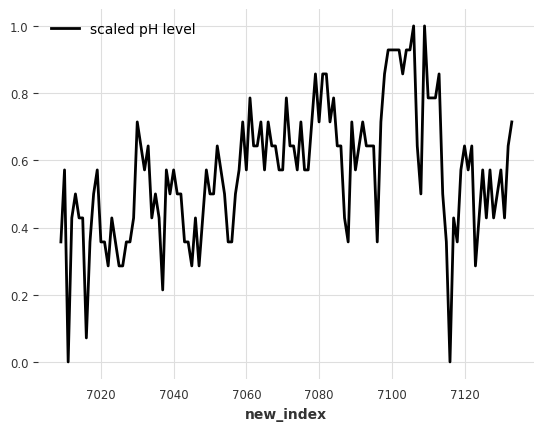

In [6]:
scaler_pH = Scaler()
series_pH_scaled = scaler_pH.fit_transform(series_pH);

series_pH_scaled.plot(label = 'scaled pH level')
plt.legend();

In [7]:
# scaler_temp = Scaler()
# series_temp_scaled = scaler_temp.fit_transform(series_temp);

# series_temp_scaled.plot(label = 'scaled temperature level')
# plt.legend();

### Make deep learning models

- Pretty much this is the part where I experiment the hyperparameters of the models
- I used 80-20 split (80% training set, 20% testing set). 70-30 and 60-40 splits perform worse when I conducted them.
- Hyperparameters used
    - **input_chunk_length** - length of the input sequence fed to the model (I usually split this to 67% of the validation split's length).
    - **output_chunk_length** - length of the forecast of the model (usually 33% of the validation split's length).
    - **random_state** - controls the randomness
    - **n_rnn_layers** - number of recurrent layers. I tried playing with the n_rnn_layers through all three RNN models, ranging from 1 to 15, and the accuracy randomly varies.

In [8]:
train_pH, test_pH = train_test_split(series_pH_scaled, test_size=0.20)
NBEATS_pH = NBEATSModel(input_chunk_length=round(len(test_pH)*0.67), output_chunk_length=round(len(test_pH)*0.33), random_state = 0)
# LSTM_pH = RNNModel(model="LSTM", training_length=len(test_pH), input_chunk_length=round(len(test_pH)*0.67), random_state = 0, n_rnn_layers = 12)
# GRU_pH = RNNModel(model="GRU", training_length=len(test_pH), input_chunk_length=round(len(test_pH)*0.67), random_state = 0, n_rnn_layers = 12)
# RNN_pH = RNNModel(model="RNN", training_length=len(test_pH), input_chunk_length=round(len(test_pH)*0.67), random_state = 0, n_rnn_layers = 12)

In [9]:
# train_temp, test_temp = train_test_split(series_temp_scaled, test_size=0.20)
# NBEATS_temp = NBEATSModel(input_chunk_length=round(len(test_temp)*0.67), output_chunk_length=round(len(test_temp)*0.33), random_state = 0)
# LSTM_temp = RNNModel(model="LSTM", training_length=len(test_temp), input_chunk_length=round(len(test_temp)*0.67), random_state = 0, n_rnn_layers = 12)
# GRU_temp = RNNModel(model="GRU", training_length=len(test_temp), input_chunk_length=round(len(test_temp)*0.67), random_state = 0, n_rnn_layers = 12)
# RNN_temp = RNNModel(model="RNN", training_length=len(test_temp), input_chunk_length=round(len(test_temp)*0.67), random_state = 0, n_rnn_layers = 12)

### Train the models using fit and predict functions

- **fit()** will fit/train the model on the given series.
- **predict** will predict n time steps following the end of the training series.
    - n can be set to a greater number than the given length of the testing set
- This part can be very tedious because of how long it runs. 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.564    Total estimated model params size (MB)


Epoch 49: 100%|██████████| 3/3 [00:00<00:00, 10.19it/s, train_loss=0.00962]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 3/3 [00:00<00:00, 10.15it/s, train_loss=0.00962]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 17.68it/s]


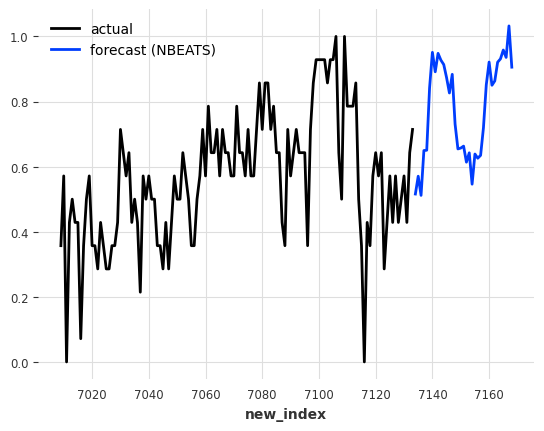

In [10]:
NBEATS_pH.fit(train_pH, verbose=True, epochs=50)
# LSTM_pH.fit(train_pH, verbose=True)
# GRU_pH.fit(train_pH, verbose=True)
# RNN_pH.fit(train_pH, verbose=True)

NBEATSpred_pH = NBEATS_pH.predict(n=len(test_pH)+35, series=train_pH)
testsplit_portion, forecast_portion = NBEATSpred_pH[:-35], NBEATSpred_pH[-35:]
# LSTMpred_pH = LSTM_pH.predict(n=len(test_pH), series=train_pH)
# GRUpred_pH = GRU_pH.predict(n=len(test_pH), series=train_pH)
# RNNpred_pH = RNN_pH.predict(n=len(test_pH), series=train_pH)

series_pH_scaled.plot(label='actual')
forecast_portion.plot(label='forecast (NBEATS)')
# LSTMpred_pH.plot(label='forecast (LSTM)')
# GRUpred_pH.plot(label='forecast (GRU)')
# RNNpred_pH.plot(label='forecast (RNN)')
plt.legend();

In [11]:
# NBEATS_temp.fit(train_temp, verbose=True)
# LSTM_temp.fit(train_temp, verbose=True)
# GRU_temp.fit(train_temp, verbose=True)
# RNN_temp.fit(train_temp, verbose=True)

# NBEATSpred_temp = NBEATS_temp.predict(n=len(test_temp), series=train_temp)
# LSTMpred_temp = LSTM_temp.predict(n=len(test_temp), series=train_temp)
# GRUpred_temp = GRU_temp.predict(n=len(test_temp), series=train_temp)
# RNNpred_temp = RNN_temp.predict(n=len(test_temp), series=train_temp)

# series_temp_scaled.plot(label='actual')
# NBEATSpred_temp.plot(label='forecast (NBEATS)')
# LSTMpred_temp.plot(label='forecast (LSTM)')
# GRUpred_temp.plot(label='forecast (GRU)')
# RNNpred_temp.plot(label='forecast (RNN)')
# plt.legend();

### Measure the accuracy of each model using MASE and RMSE

In [12]:
print('MASE (NBEATS) = {:.3f}'.format(mase(test_pH, NBEATSpred_pH, train_pH)))
print('RMSE (NBEATS) = {:.5f}'.format(rmse(test_pH, NBEATSpred_pH)))
# print('MAPE (NBEATS) = {:.5f}%'.format(mape(test_pH, NBEATSpred_pH)))

# print('MASE (LSTM) = {:.3f}'.format(mase(test_pH, LSTMpred_pH, train_pH)))
# print('RMSE (LSTM) = {:.5f}'.format(rmse(test_pH, LSTMpred_pH)))

# print('MASE (GRU) = {:.3f}'.format(mase(test_pH, GRUpred_pH, train_pH)))
# print('RMSE (GRU) = {:.5f}'.format(rmse(test_pH, GRUpred_pH)))

# print('MASE (RNN) = {:.3f}'.format(mase(test_pH, RNNpred_pH, train_pH)))
# print('RMSE (RNN) = {:.5f}'.format(rmse(test_pH, RNNpred_pH)))

ValueError: The actual series must be strictly positive to compute the MAPE.


MASE (NBEATS) = 2.365
RMSE (NBEATS) = 0.33989


ValueError: The actual series must be strictly positive to compute the MAPE.

In [ ]:
# print('MASE (NBEATS) = {:.3f}'.format(mase(test_temp, NBEATSpred_temp, train_temp)))
# print('RMSE (NBEATS) = {:.5f}'.format(rmse(test_temp, NBEATSpred_temp)))

# print('MASE (LSTM) = {:.3f}'.format(mase(test_temp, LSTMpred_temp, train_temp)))
# print('RMSE (LSTM) = {:.5f}'.format(rmse(test_temp, LSTMpred_temp)))

# print('MASE (GRU) = {:.3f}'.format(mase(test_temp, GRUpred_temp, train_temp)))
# print('RMSE (GRU) = {:.5f}'.format(rmse(test_temp, GRUpred_temp)))

# print('MASE (RNN) = {:.3f}'.format(mase(test_temp, RNNpred_temp, train_temp)))
# print('RMSE (RNN) = {:.5f}'.format(rmse(test_temp, RNNpred_temp)))